# Pruebas de OCR para el formato de factura que nos encontramos


### Primera prueba: Imagen sin tratamiento

In [7]:
from PIL import Image
import pytesseract
import cv2
from IPython.display import display


# Recoger la ubicación de las imágenes


img = Image.open("factura0.jpg")

text = pytesseract.image_to_string(img)

print(text)



Factura
#302087

Fecha de emision: 2024-04-03
Fecha de vencimiento: 2024-05-04

Datos del Emisor:

Escobar Ltd

23753 Kevin Heights Apt. 952 East James, NH 58110
852-611-7600x00438

rosewhitney @hull.info

yILO86tzq553

Datos del Receptor:

Dawn Huff

19318 Lewis Alley Jessicafort, DE 07200
001-355-759-3217

leah45@hotmail.com

BAd485Cms932

Precio Unitario

Descripcion Cantidad
re-contextualize world-class portals 1
enable robust methodologies 5

88.74 88.74

10.09 50.45

Subtotal: 139.19
VAT (16%): 22.27
Total: 161.46

Método de pago: Credit Card




### Fallos a intentar corregir con preprocesamiento

Vemos como falla por ejemplo en el #, además confunde los @ con 0s. También vemos como los precios salen separados y no es capaz de conservar la estructura. Confunde el 7 con una barra y esto no es bueno para nuesto modelo de lenguaje que va a interpretar estos datos. intentaremos conseguir un mejor resultado ahora aplicando grayScale.

### Segunda prueba: Imagen a escala de grises

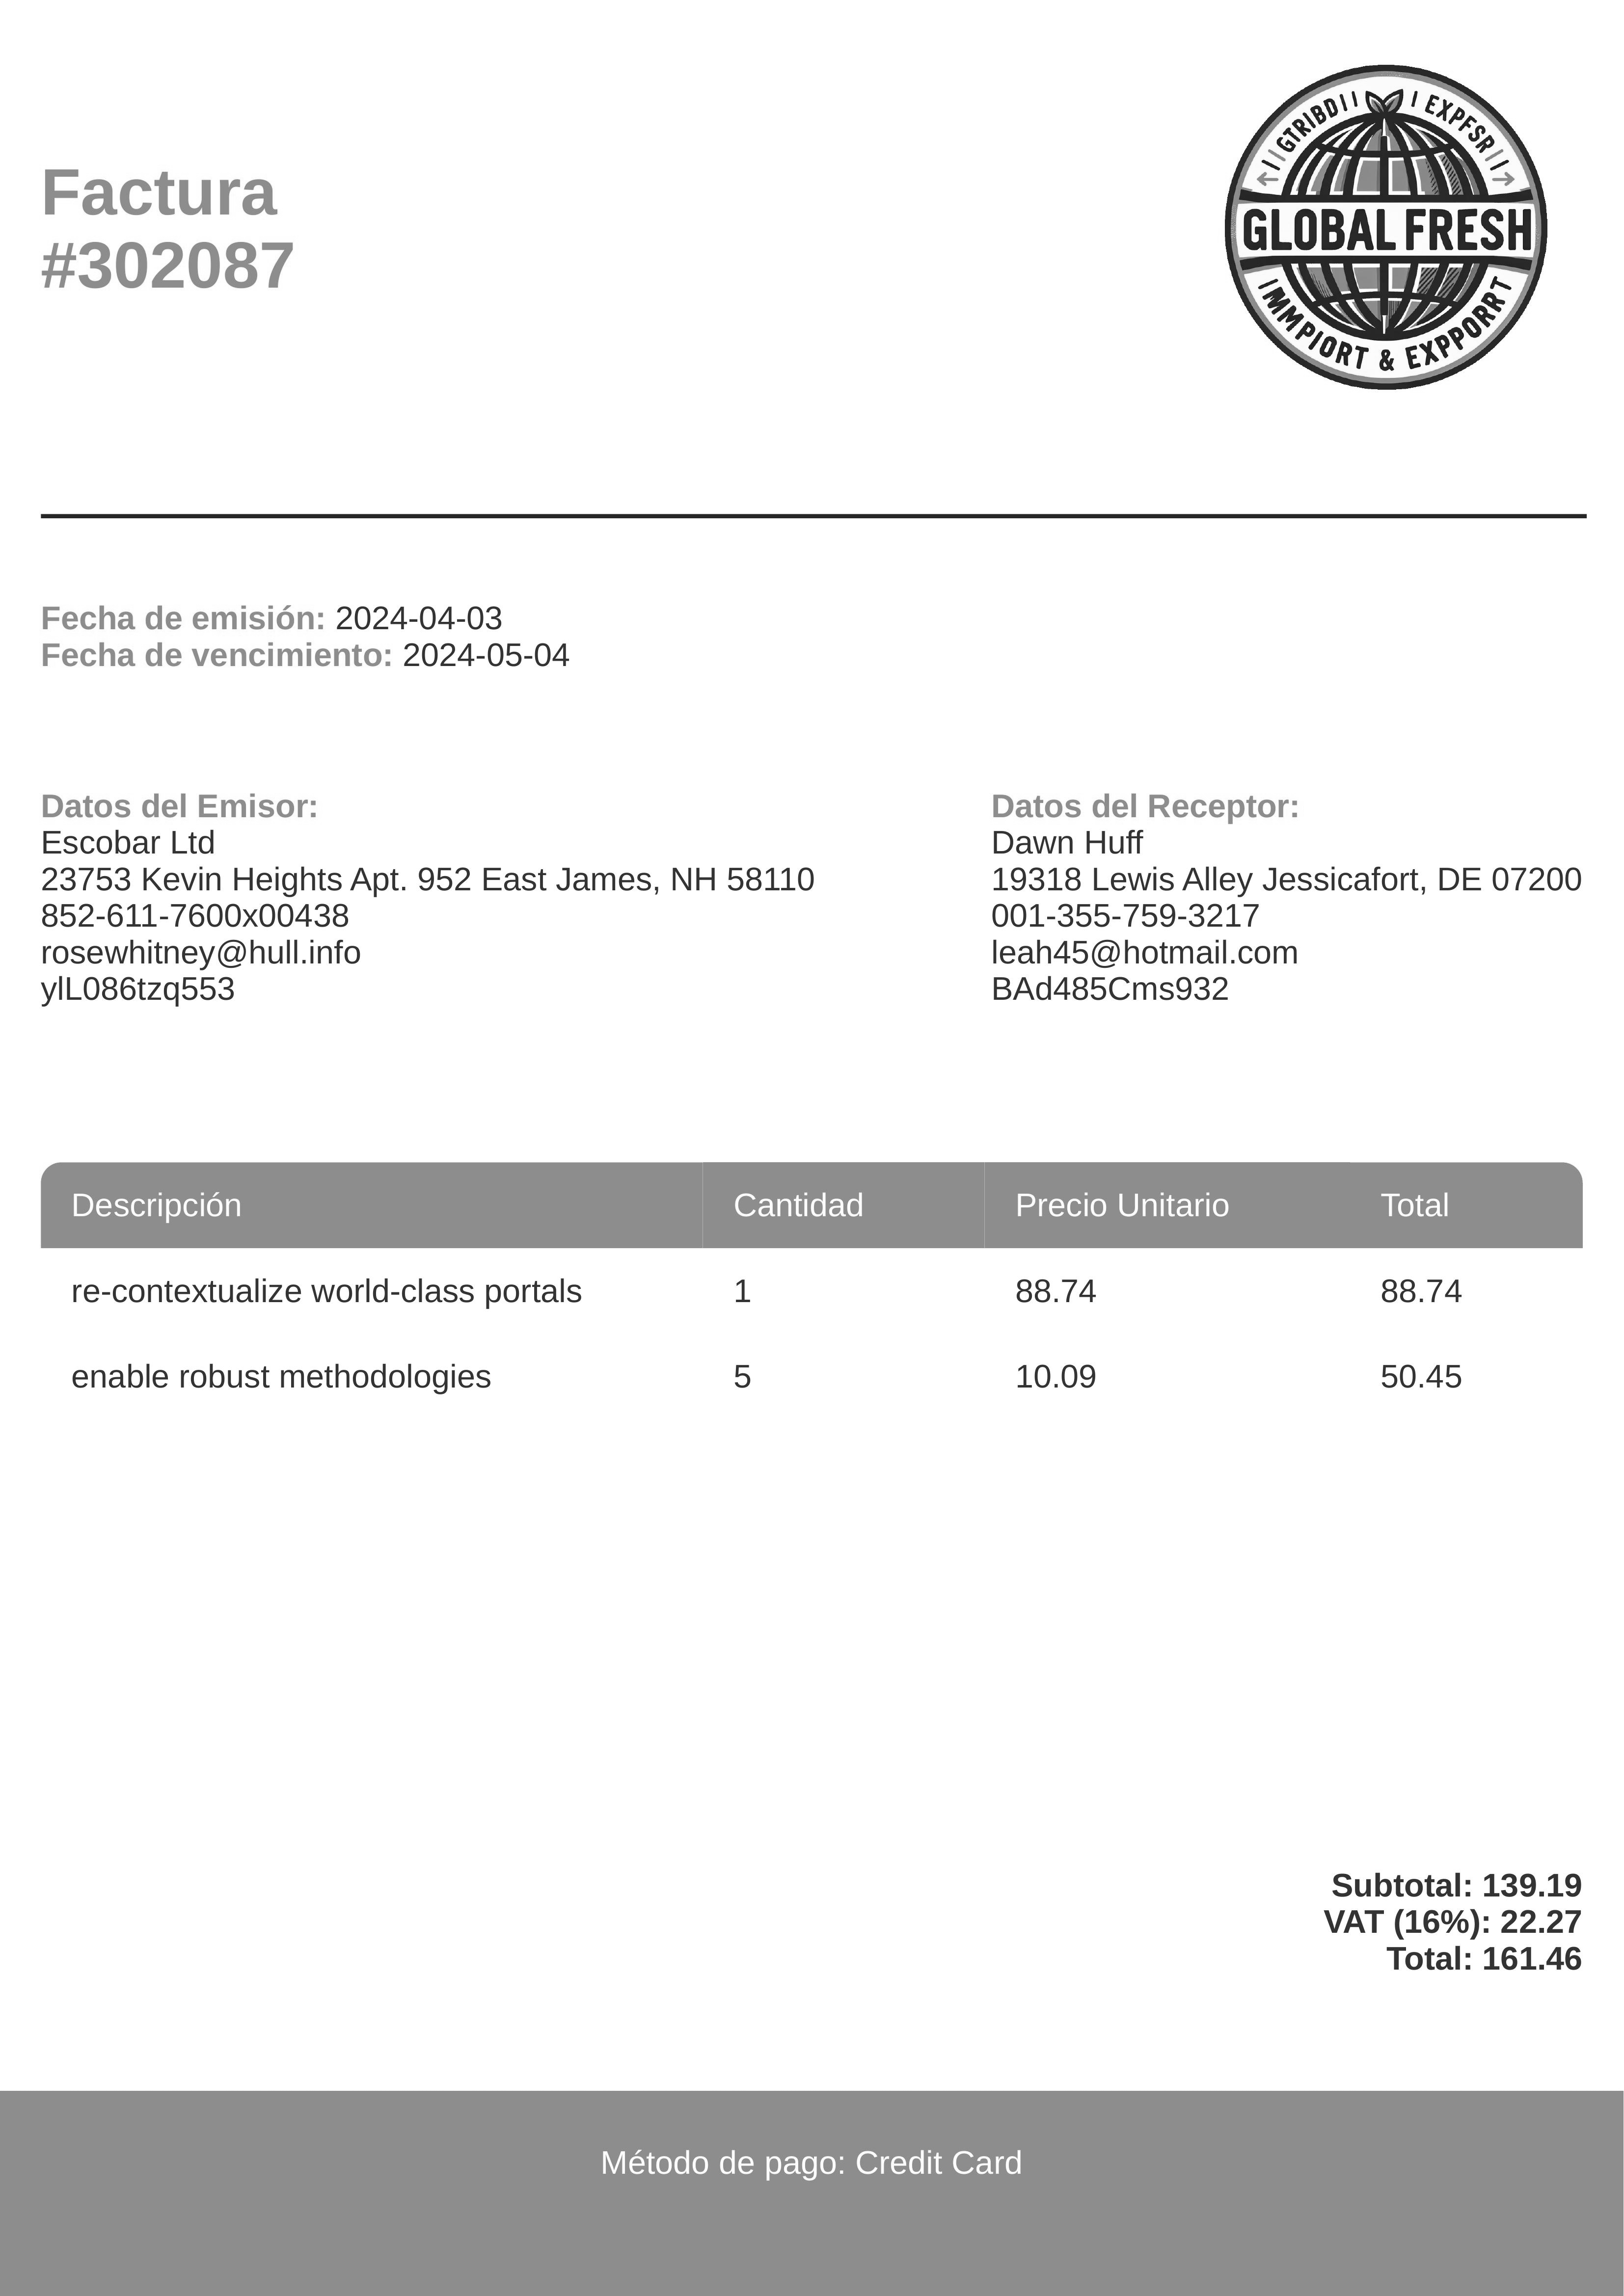

In [9]:
## Convertir la imagen a escala de grises
img = img.convert('L')
display(img)

In [10]:
text = pytesseract.image_to_string(img)

print(text)

Factura
#302087

Fecha de emision: 2024-04-03
Fecha de vencimiento: 2024-05-04

Datos del Emisor:

Escobar Ltd

23753 Kevin Heights Apt. 952 East James, NH 58110
852-611-7600x00438

rosewhitney @hull.info

yILO86tzq553

Datos del Receptor:

Dawn Huff

19318 Lewis Alley Jessicafort, DE 07200
001-355-759-3217

leah45@hotmail.com

BAd485Cms932

Precio Unitario

Descripcion Cantidad
re-contextualize world-class portals 1
enable robust methodologies 5

88.74 88.74

10.09 50.45

Subtotal: 139.19
VAT (16%): 22.27
Total: 161.46

Método de pago: Credit Card




### Resultados

Podemos ver que aquí en este caso hemos conseguido mejores resultados, lo ideal ahora sería conseguir separar en chuncks de datos con openCV para no confundir con los ordenes y no sobrediseñar el Modelo Bert para interpretar textos con tanta complejidad estructural y falta de coherencia.


# OpenCV
